In [1]:
# Standard imports
import os
import sys

In [2]:
def get_script_directory():
    try:
        # This will work if the script is run directly
        script_path = os.path.abspath(__file__)
    except NameError:
        # This will work in an interactive environment like Jupyter
        script_path = os.path.abspath('')
    
    return script_path

In [3]:
sys.path.append(r"C:\Geotech_Research\CriticalSoilModels\pumat")

from lib.Load_Classes.Popular_Load_Class import PopularPath
from lib.Driver_Classes.Mod_Driver_Setup import DriverModelSetup
from lib.Driver_Classes.Mod_Driver_Model import DriverModel
from lib.general_functions.executing_runs import generate_batch_script, run_batch_script

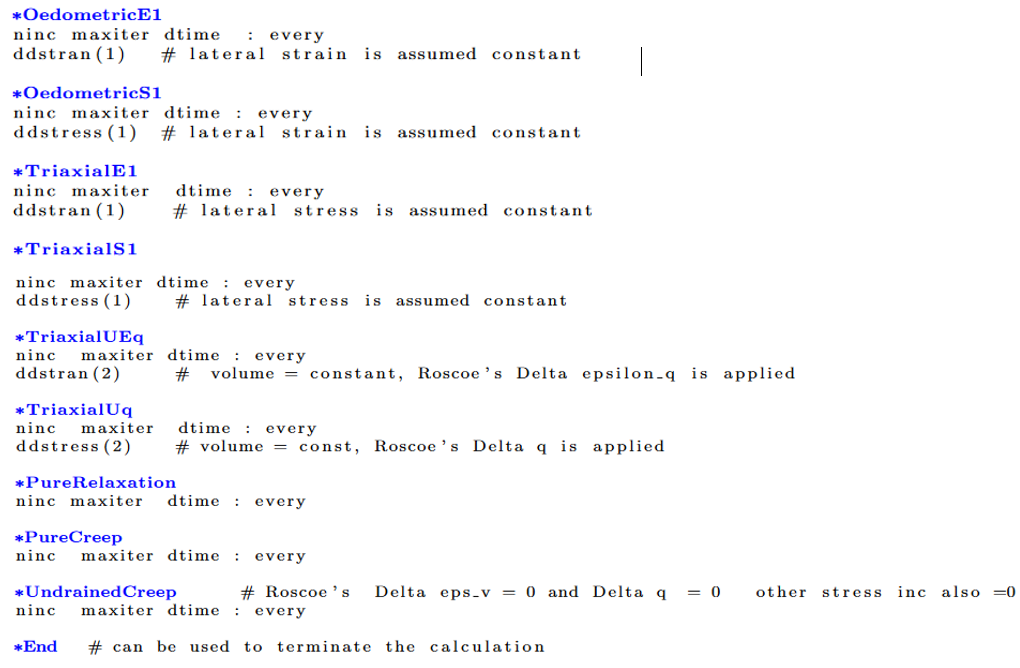

In [4]:
test_name = "TriaxialE1"
load_params = {
    "ninc": 1000,
    "maxiter": 500,
    "dtime"  : 500_000,
    "every"  : 1,
    "ddstran_1": -0.5,
}

load = PopularPath(test_name, load_params)

In [5]:
# This needs to be in the order that the parameters should be in
properties = {
    "Shear modulus" : 2500,
    "poisson ratio" : 0.2,
    "M_tc"          : 1.0,
    "Nova Vol coeff": 0,
    "D_min"         : 0,
    "h"             : 0,
    "alpha_G"       : 0,
    "alpha_K"       : 0,
    "alpha_D"       : 0,
    "D_part"        : 0,
    "G_s"           : 2.65,
    "inc_eps_ref"   : 0,
    "switch_smooth" : 0,
    "N_s"           : 0,
    # "switch_originl": 0 # Somehow I have an extra one, Doesn't matter for linear

}

In [6]:
folder = get_script_directory()
exe_name = r"incrementalDriver.exe"

exe_path = os.path.join(folder, exe_name)

setup =DriverModelSetup(folder, "NAMC", "output.txt")

In [7]:
setup.store_loads(load)

In [8]:
print(setup)

Constitutive model name: NAMC
Folder path: c:\Geotech_Research\CriticalSoilModels\pumat\2_NAMC_perf_plast


In [9]:
setup.write_parameters_file(properties)
stress = [-100, -100, -100, 0, 0, 0]
state_params = {
    "param_1" : 0, "param_2" : 0,
    "param_3" : 0, "param_4" : 0,
    "param_5" : 0, "param_6" : 0,
    "param_7" : 0, "param_8" : 0,
    "param_9" : 0, "param_10": 0,
    "param_11": 0, "param_12": 0,
    "param_13": 0, "param_14": 0,
    "param_15": 0, "param_16": 0,
    "param_17": 0, "param_18": 0,
    "param_19": 0,
}

setup.write_initial_conditions_file(stress, state_params)
setup.write_loads()

In [10]:
generate_batch_script(folder, exe_path)
batch_file_path = os.path.join(folder, "run_model.bat")
run_batch_script(batch_file_path)

Batch file 'c:\Geotech_Research\CriticalSoilModels\pumat\2_NAMC_perf_plast\run_model.bat' executed successfully.


In [11]:
model= DriverModel(folder, "MC", exe_path, "output.txt")

In [12]:
print(model.results)

Output file name: output.txt
Results folder path: c:\Geotech_Research\CriticalSoilModels\pumat\2_NAMC_perf_plast



In [13]:
model.results.store_all()

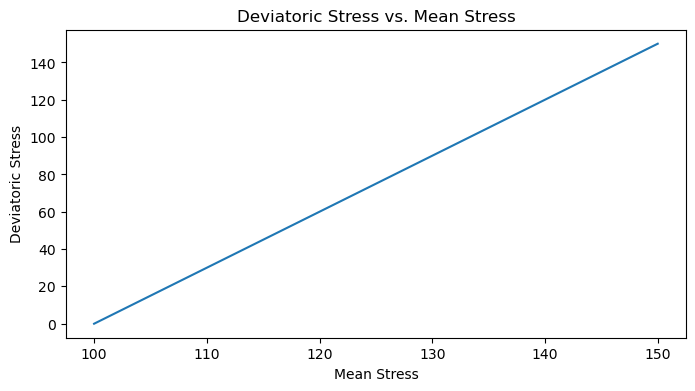

In [14]:
model.results.quick_plot_stress(compression_pos=True)

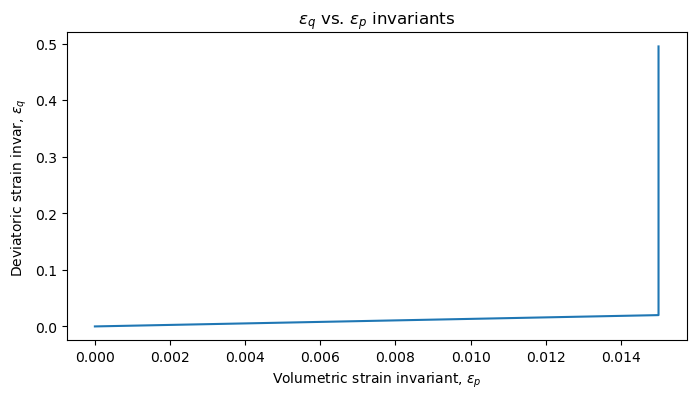

In [15]:
model.results.quick_plot_strain(compression_pos=True)

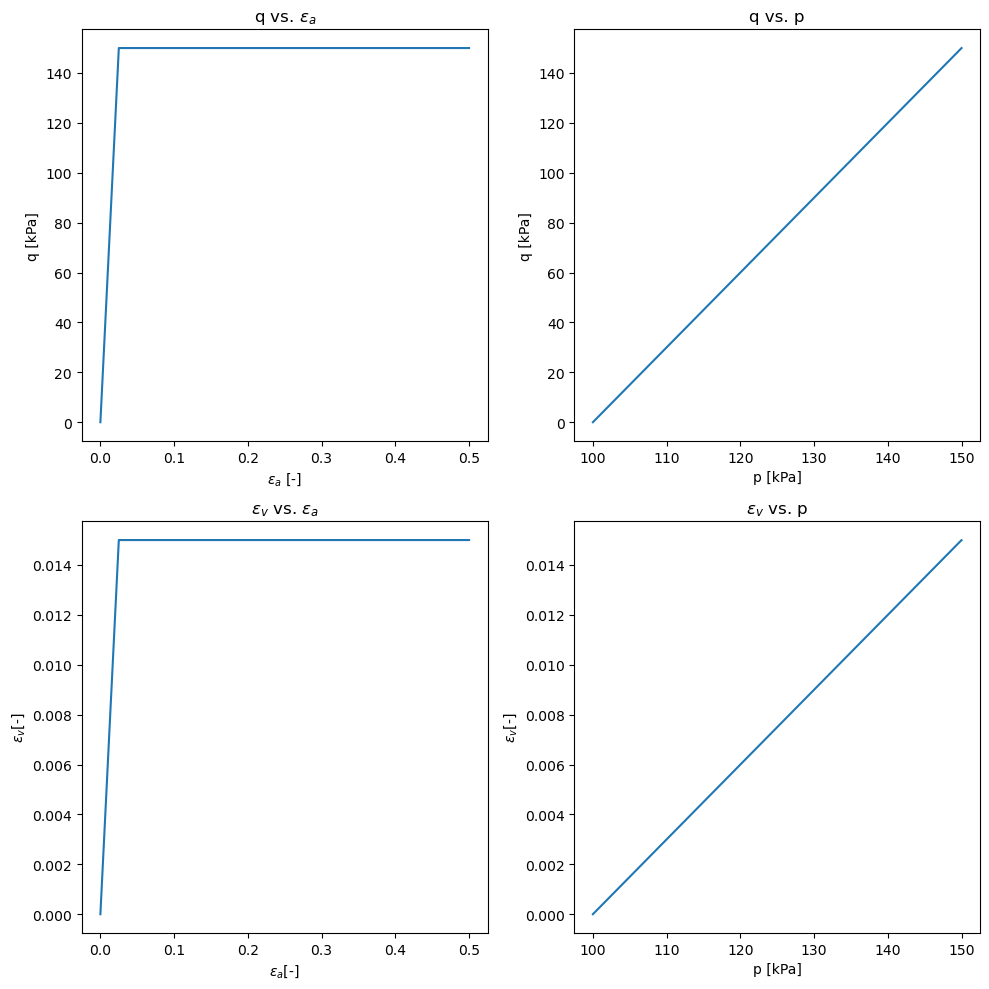

In [16]:
model.results.quick_quad_plot()